In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A quick introduction

This notebook is focussed on the fundamentals of Linear Regression.

## Linear Regression

Suppose we observe a set of predictors  
$$
X = (X_1, X_2, \dots, X_p)
$$  
and wish to predict a real-valued response variable $Y$. The linear regression model assumes that the relationship between the predictors and the response can be expressed, or well-approximated, by a linear function of the inputs:

$$
f(X) = \beta_0 + \sum_{j=1}^{p} X_j \beta_j
$$

where:
- $\beta_0$ is the intercept  
- $\beta_j$ are unknown coefficients (parameters)  
- $X_j$ are the input features  

The linear model either assumes that the regression function  
$$
\mathbb{E}[Y \mid X]
$$  
is linear in $X$, or that a linear model provides a reasonable approximation to the true relationship.

---

## Feature Construction

Although the model is linear in the parameters $\beta$, the features $X_j$ themselves can come from various sources, including:

- Quantitative inputs
- Transformations of quantitative inputs (e.g. log, square-root, square)
- Basis expansions, such as polynomial terms:

$$
X_2 = X_1^2, \quad X_3 = X_1^3
$$

- Dummy (indicator) variables for qualitative features
- Interaction terms, for example:

$$
X_3 = X_1 \cdot X_2
$$

Regardless of how the features are constructed, the model remains linear in the coefficients.

---

## Estimation via Least Squares

Assume we are given a training dataset

$$
(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N),
$$

where each

$$
x_i = (x_{i1}, x_{i2}, \dots, x_{ip})^T
$$

is a vector of feature measurements for the $i$-th observation.

The most common estimation method is **Ordinary Least Squares (OLS)**, which chooses coefficients $\beta$ to minimize the Residual Sum of Squares (RSS):

$$
\text{RSS}(\beta)
= \sum_{i=1}^{N}
\left(
y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j
\right)^2
$$


Let:
- $X \in \mathbb{R}^{N \times (p+1)}$ be the design matrix (with a leading column of ones),
- $y \in \mathbb{R}^N$ be the response vector,
- $\beta \in \mathbb{R}^{p+1}$ be the parameter vector.

Then the residual sum of squares can be written compactly as:

$$
\text{RSS}(\beta) = (y - X\beta)^T (y - X\beta)
$$


Differentiating the RSS with respect to $\beta$ gives:

$$
\frac{\partial \text{RSS}}{\partial \beta}
= -2 X^T (y - X\beta)
$$

Setting the gradient equal to zero yields the normal equations:

$$
X^T (y - X\beta) = 0
$$

Assuming that $X$ has full column rank, the unique least squares solution is:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

---

In [9]:
data = pd.read_csv('prostate.csv')
training = data[data['train'] == True]
testing = data[data['train'] == False]
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


## Dataset and Model

We analyze a prostate cancer dataset containing clinical and pathological measurements for each patient. The objective is to model prostate-specific antigen (PSA) levels using linear regression.

The response variable is **`lpsa`**, the log of prostate-specific antigen. The predictors are:

- **`lcavol`**: log cancer volume  
- **`lweight`**: log prostate weight  
- **`age`**: patient age  
- **`lbph`**: log benign prostatic hyperplasia  
- **`svi`**: seminal vesicle invasion indicator (0/1)  
- **`lcp`**: log capsular penetration  
- **`gleason`**: Gleason score  
- **`pgg45`**: percent of Gleason scores 4 or 5  

The linear regression model is specified as:

$$
\texttt{lpsa} = \beta_0
+ \beta_{lcavol} X_{lcavol}
+ \beta_{lweight} X_{lweight}
+ \beta_{age} X_{age}
+ \beta_{lbph} X_{lbph}
+ \beta_{svi} X_{svi}
+ \beta_{lcp} X_{lcp}
+ \beta_{gleason} X_{gleason}
+ \beta_{pgg45} X_{pgg45}
+ \varepsilon
$$

Each coefficient represents the marginal effect of a predictor on log PSA, holding other variables constant.


## Multicollinearity Check

Before fitting an OLS model, it is useful to examine multicollinearity among the regressors. Perfect collinearity between predictors makes the matrix $X^\top X$ singular, which prevents computation of its inverse and, therefore, the OLS estimator.

To assess potential multicollinearity, we visualize the pairwise correlations between predictors using a heatmap.


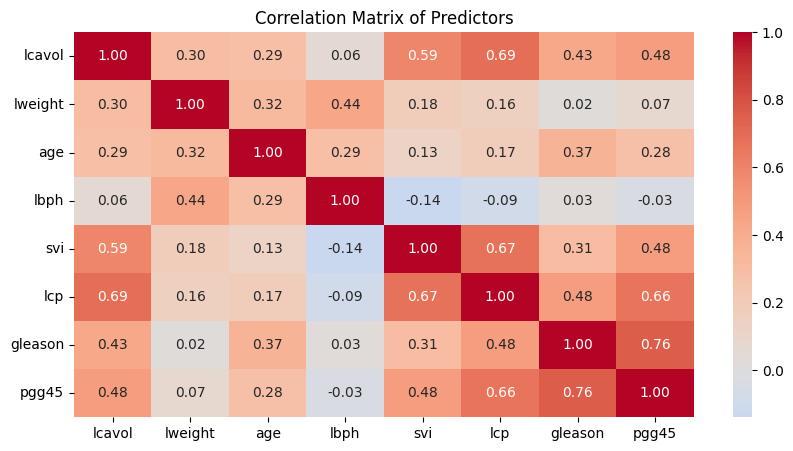

In [19]:
predictors = [
    "lcavol", "lweight", "age", "lbph",
    "svi", "lcp", "gleason", "pgg45"
]

X = training[predictors]
corr_matrix = X.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix of Predictors")
plt.show()


The heatmap shows moderate correlations among several predictors, particularly those related to tumor severity such as `lcavol`, `lcp`, `gleason`, and `pgg45`. No pair of variables exhibits perfect collinearity, suggesting that OLS estimation is feasible, though some coefficient instability due to multicollinearity may be present.


# Splitting the Dataset 
Training and Testing, each being split on regressors and output

In [ ]:
y_train = training['lpsa'].values
X_train = X[predictors].values
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))  # Add intercept term

X_test = testing[predictors].values 
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))  # Add intercept term
y_test = testing['lpsa'].values.reshape(-1, 1)

### Fit Oridinary Least Squares

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$


In [24]:
# OLS via normal equations (fit on training set only)

beta_hat = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
y_train_hat = X_train @ beta_hat
y_test_hat = X_test @ beta_hat


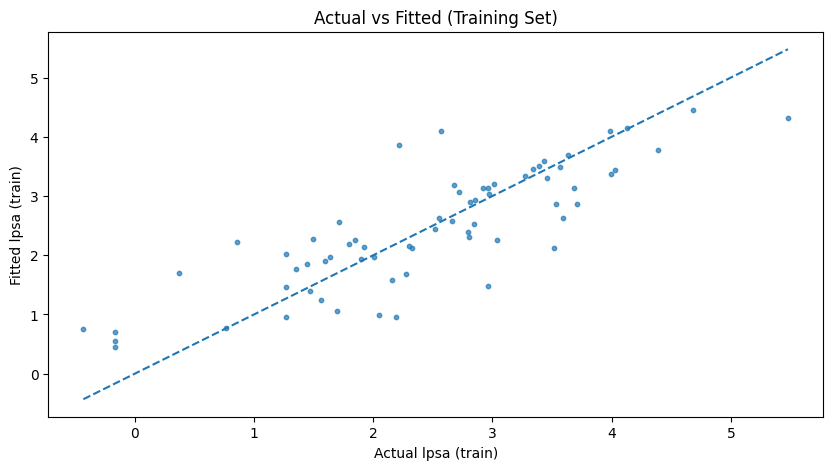

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_hat, alpha=0.7, s=10)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    linestyle="--"
)
plt.xlabel("Actual lpsa (train)")
plt.ylabel("Fitted lpsa (train)")
plt.title("Actual vs Fitted (Training Set)")
plt.show()


The actual vs fitted plot on the training set shows that predicted values track the observed `lpsa` reasonably well, with most points lying near the 45° reference line. While some dispersion is present—especially at higher values—there is no clear evidence of systematic bias or nonlinearity.


### Finite-Sample OLS Assumptions

**Which assumptions are required for an unbiased estimate of $\beta$?**

- Linearity of the model:
  $$
  Y = X\beta + \varepsilon
  $$
- No perfect multicollinearity:
  $$
  \mathrm{rank}(X) = p + 1
  $$
- Zero conditional mean:
  $$
  \mathbb{E}[\varepsilon \mid X] = 0
  $$

---

**Which assumptions are required for an efficient estimate of $\beta$ (BLUE)?**

In addition to the assumptions above:

- Homoskedasticity and no correlation in errors:
  $$
  \mathrm{Var}(\varepsilon \mid X) = \sigma^2 I
  $$

Under these conditions, OLS is the Best Linear Unbiased Estimator.

---

**Which assumptions are required for valid finite-sample statistical inference?**

In addition to the assumptions above:

- Normality of errors:
  $$
  \varepsilon \mid X \sim \mathcal{N}(0, \sigma^2 I)
  $$

This guarantees exact finite-sample t-tests and F-tests.


### Step 1 (Necessary Conditions for Unbiased Betas)

#### Marginal Relationships

Before fitting the multivariate OLS model, we examine the marginal relationship between each predictor and the response. These plots display the unconditional association between a single regressor and `lpsa`, without controlling for other variables.

While marginal relationships do not test the multivariate linearity assumption, they provide useful intuition about directionality, scale, and potential nonlinear trends in the data.


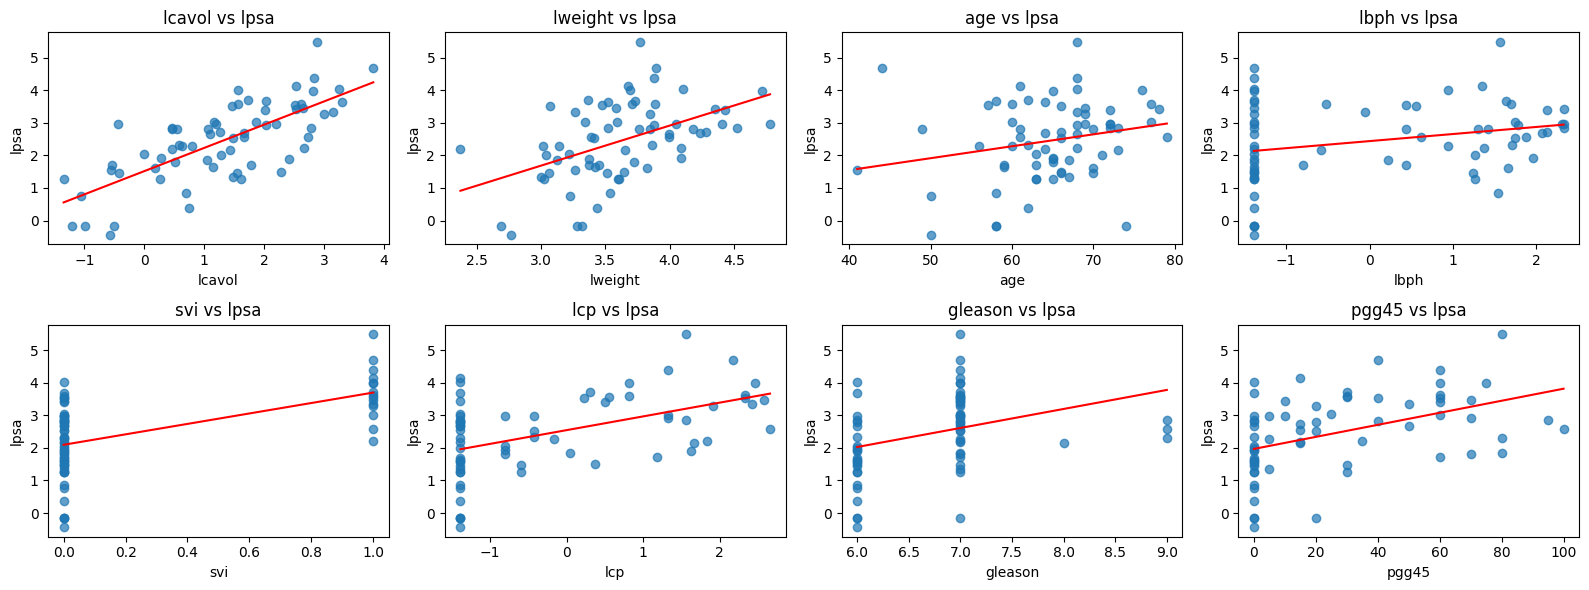

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(16, 6))
axes = axes.flatten()

for ax, var in zip(axes, predictors):
    x = training[var].values
    y = training["lpsa"].values
    
    ax.scatter(x, y, alpha=0.7)
    
    beta_1 = np.cov(x, y, bias=True)[0, 1] / np.var(x)
    beta_0 = y.mean() - beta_1 * x.mean()
    
    x_line = np.linspace(x.min(), x.max(), 100)
    ax.plot(x_line, beta_0 + beta_1 * x_line, color="red")
    
    ax.set_xlabel(var)
    ax.set_ylabel("lpsa")
    ax.set_title(f"{var} vs lpsa")

plt.tight_layout()
plt.show()


#### Linearity of the Model

#### Linearity and Homoskedasticity of the Model

After fitting the multivariate OLS model, we examine residuals plotted against fitted values to assess both the linearity of the conditional mean and the homoskedasticity of the error terms. Systematic structure or curvature in the residuals would indicate functional form misspecification, while changes in the spread of residuals across fitted values would suggest heteroskedasticity.

The absence of clear patterns and a roughly constant variance in the residuals supports the linearity and homoskedasticity assumptions. While violations of these assumptions may be consistent with failures of the zero conditional mean assumption, this diagnostic does not directly test exogeneity.


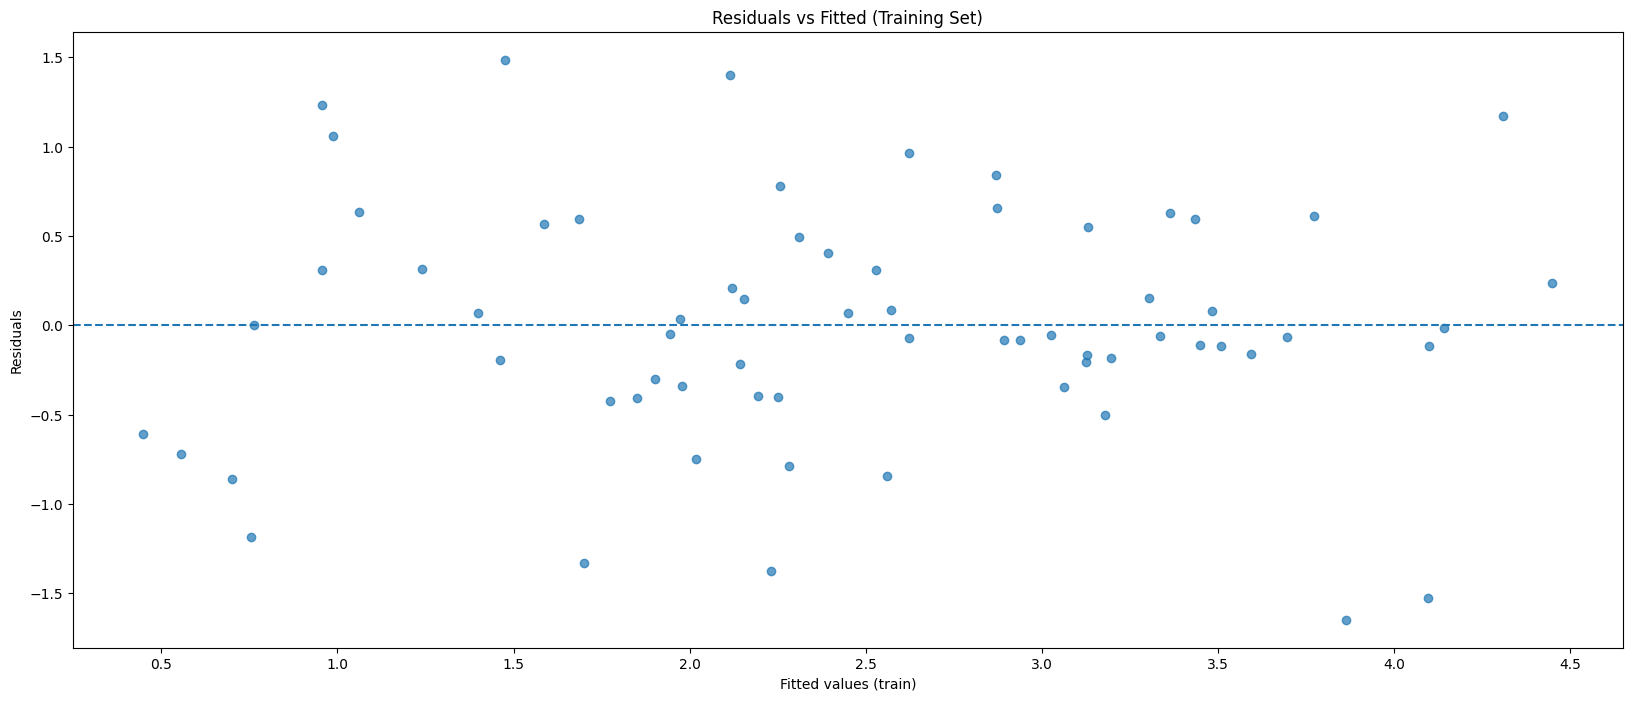

In [41]:
residuals = y_train - y_train_hat
plt.figure(figsize=(20, 8))
plt.scatter(y_train_hat, residuals, alpha=0.7)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values (train)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Training Set)")
plt.show()


#### No Perfect Multicollinearity

Before fitting the OLS model, we verify that the design matrix has full column rank. Perfect multicollinearity among regressors would imply that at least one column of the design matrix is a linear combination of the others, rendering the matrix $X^\top X$ singular and the OLS estimator undefined.

To assess this, we compute the rank of the design matrix constructed from the training data. A full rank equal to the number of columns confirms the absence of perfect multicollinearity and ensures that the OLS estimator can be computed.
.


In [47]:
rank_X = np.linalg.matrix_rank(X_train)
num_columns = X_train.shape[1]

print(f"Rank of X: {rank_X}")
print(f"Number of columns (p + 1): {num_columns}")


Rank of X: 9
Number of columns (p + 1): 9


#### Residuals vs Regressors

We plot the residuals against each predictor to examine potential nonlinear patterns and regressor-specific heteroskedasticity. Systematic structure in these plots would suggest functional form misspecification or omitted nonlinear effects.

While these diagnostics can reveal issues consistent with violations of the zero conditional mean assumption, they do not provide a direct test of exogeneity.


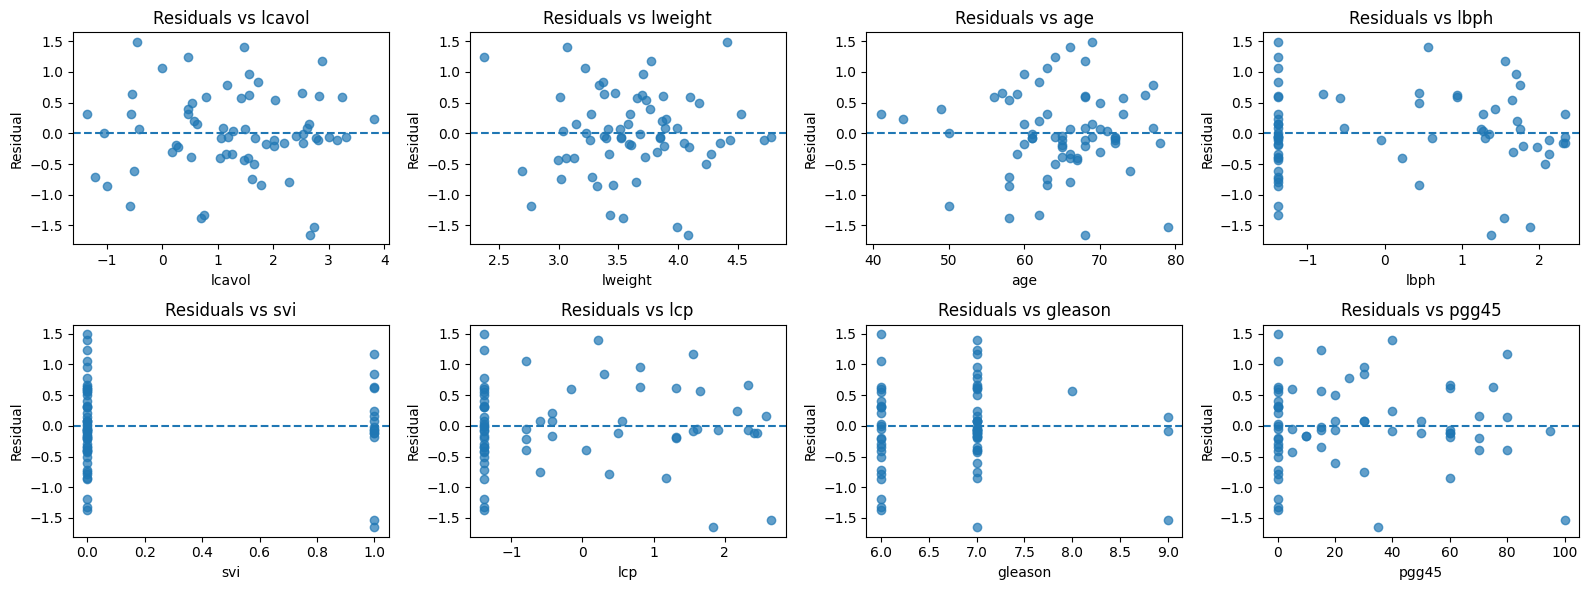

In [48]:
import matplotlib.pyplot as plt

residuals = y_train - y_train_hat

fig, axes = plt.subplots(2, 4, figsize=(16, 6))
axes = axes.flatten()

for ax, var in zip(axes, predictors):
    ax.scatter(training[var], residuals, alpha=0.7)
    ax.axhline(0, linestyle="--")
    ax.set_xlabel(var)
    ax.set_ylabel("Residual")
    ax.set_title(f"Residuals vs {var}")

plt.tight_layout()
plt.show()


To assess the normality assumption required for finite-sample inference, we examine the distribution of the training residuals using both a histogram and a QQ plot. Approximate symmetry and close adherence to the normal reference line support the normality assumption.


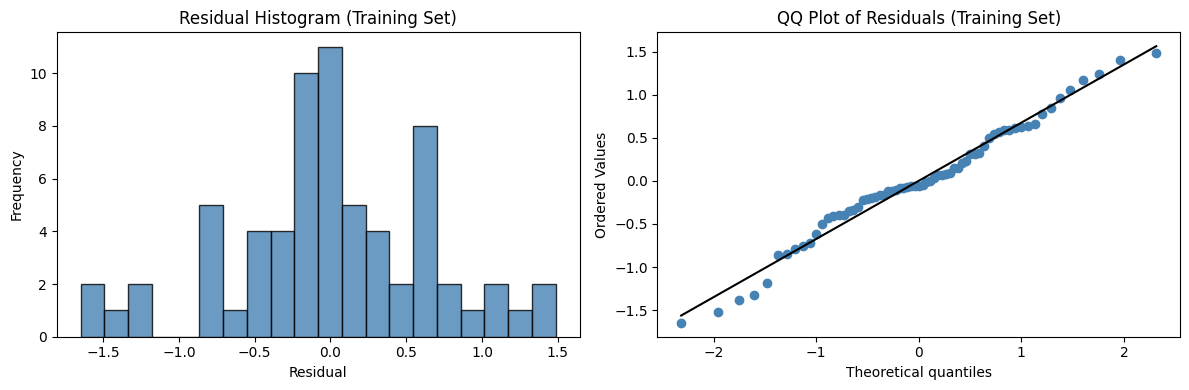

In [51]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# residuals from training set
residuals = (y_train - y_train_hat).flatten()

color = "steelblue"

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(residuals, bins=20, color=color, edgecolor="black", alpha=0.8)
axes[0].set_title("Residual Histogram (Training Set)")
axes[0].set_xlabel("Residual")
axes[0].set_ylabel("Frequency")

# QQ plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].get_lines()[0].set_markerfacecolor(color)
axes[1].get_lines()[0].set_markeredgecolor(color)
axes[1].get_lines()[1].set_color("black")
axes[1].set_title("QQ Plot of Residuals (Training Set)")

plt.tight_layout()
plt.show()



Marginal plots show broadly linear, positive associations between most predictors and `lpsa`, providing initial intuition about scale and direction. Residuals plotted against fitted values exhibit no systematic structure and approximately constant variance, supporting the linearity and homoskedasticity assumptions. Residuals plotted against individual regressors show no systematic dependence, consistent with the zero conditional mean assumption $ \mathbb{E}[\varepsilon \mid X] = 0 $, though this cannot be formally tested using the sample alone. The residual histogram and QQ plot indicate approximate normality, supporting finite-sample inference. Finally, the design matrix has full column rank $ \mathrm{rank}(X) = p + 1 $, confirming the absence of perfect multicollinearity and ensuring the OLS estimator is well-defined.


# Out-of-Sample Evaluation

After verifying the OLS assumptions using the training set, we assess the model’s out-of-sample predictive performance on the test set. This step evaluates how well the fitted model generalizes to unseen data and guards against overfitting.

Using the estimated coefficients $\hat{\beta}$ obtained from the training data, we generate predictions on the test set:

In [54]:
# OOS predictions
y_test_hat = X_test @ beta_hat

The out-of-sample predictive performance is evaluated using the following metrics.

**Mean Squared Error (MSE):**
$$
\mathrm{MSE}_{\text{OOS}} = \frac{1}{n_{\text{test}}}
\sum_{i=1}^{n_{\text{test}}}
\left( y_i - \hat{y}_i \right)^2
$$

**Root Mean Squared Error (RMSE):**
$$
\mathrm{RMSE}_{\text{OOS}} =
\sqrt{\mathrm{MSE}_{\text{OOS}}}
$$

**Out-of-Sample $R^2$:**
$$
R^2_{\text{OOS}} =
1 -
\frac{
\sum_{i=1}^{n_{\text{test}}}
\left( y_i - \hat{y}_i \right)^2
}{
\sum_{i=1}^{n_{\text{test}}}
\left( y_i - \bar{y}_{\text{test}} \right)^2
}
$$

where $y_i$ denotes the observed response in the test set, $\hat{y}_i$ denotes the corresponding out-of-sample prediction, and $\bar{y}_{\text{test}}$ is the mean of the test responses.

Intuitively, the out-of-sample $R^2$ compares the model’s predictive performance to a simple baseline that always predicts the mean of the test set. An $R^2_{\text{OOS}}$ of zero indicates that the model performs no better than this baseline, positive values indicate improved predictive accuracy, and negative values imply that the model performs worse than simply predicting the mean.



In [66]:
# Mean Squared Error
mse_oos = np.mean((y_test - y_test_hat) ** 2)
# Root Mean Squared Error
rmse_oos = np.sqrt(mse_oos)
# Out-of-sample R^2
ss_res = np.sum((y_test - y_test_hat) ** 2)
ss_tot = np.sum((y_test - y_test.mean()) ** 2)
r2_oos = 1 - ss_res / ss_tot

metrics_oos = pd.DataFrame({
    "Metric": ["MSE (OOS)", "RMSE (OOS)", "R² (OOS)"],
    "Value": [mse_oos, rmse_oos, r2_oos]
})
metrics_oos["Value"] = metrics_oos["Value"].round(2)
metrics_oos

,Metric,Value
0,MSE (OOS),1.57
1,RMSE (OOS),1.25
2,R² (OOS),-43.94


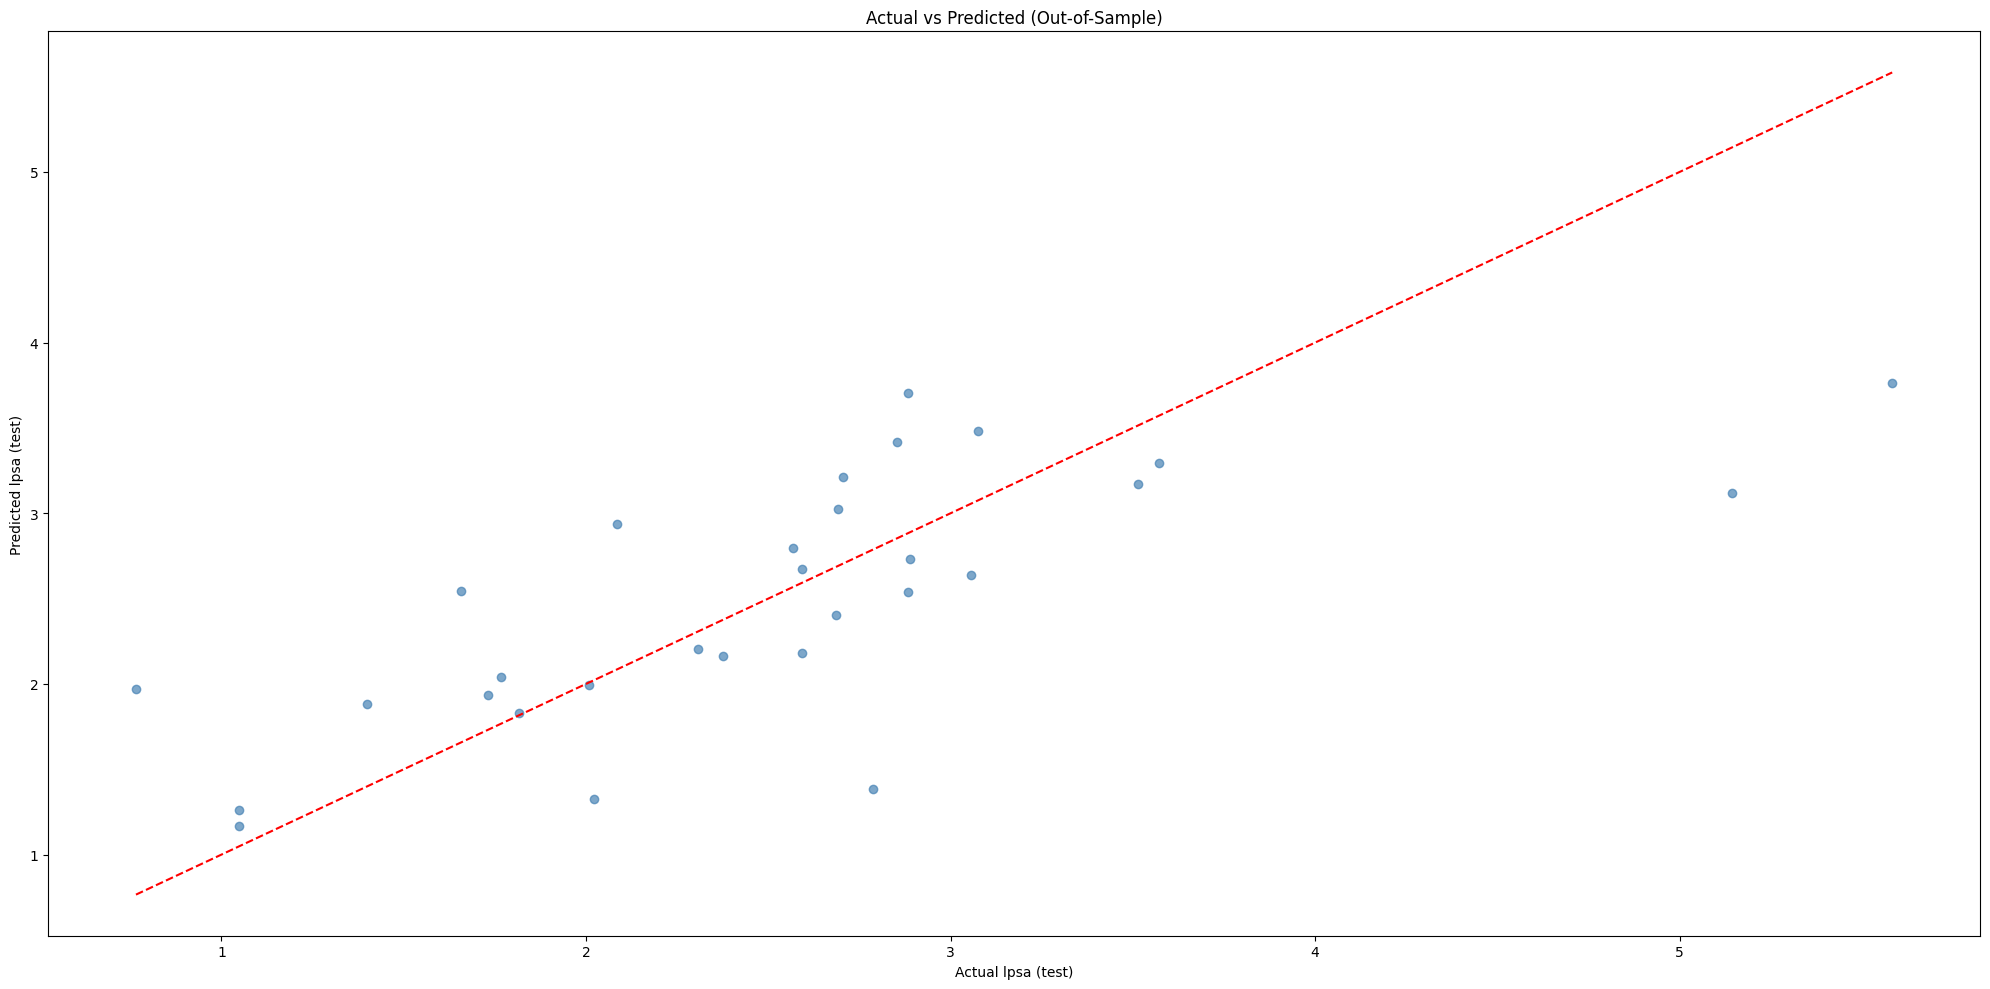

In [63]:
plt.figure(figsize=(20, 10))

plt.scatter(y_test, y_test_hat, alpha=0.7, color="steelblue")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    color="red"
)

plt.xlabel("Actual lpsa (test)")
plt.ylabel("Predicted lpsa (test)")
plt.title("Actual vs Predicted (Out-of-Sample)")
plt.tight_layout()
plt.show()


# Model Inference

### Inference via t-Tests

We conduct t-tests on the OLS coefficients to assess whether each predictor has a statistically significant partial effect on the response variable. All inference is based on the training data and relies on the assumption of homoskedastic, normally distributed errors.


#### Step 1: Estimate the Error Variance

We begin by estimating the variance of the error term using the training residuals. After estimating the OLS coefficients, the residuals are given by
$$
\hat{\varepsilon}_i = y_i - x_i^\top \hat{\beta}.
$$

The error variance is then estimated as
$$
\hat{\sigma}^2
=
\frac{1}{n - k}
\sum_{i=1}^{n} \hat{\varepsilon}_i^2,
$$
where $n$ denotes the number of observations and $k$ denotes the number of estimated parameters, including the intercept. This adjustment accounts for degrees of freedom and ensures an unbiased estimate of the error variance under the classical OLS assumptions.


In [79]:
n, k = X_train.shape  # k includes intercept
residuals = y_train - y_train_hat
sigma2_hat = (residuals.T @ residuals) / (n - k)

#### Step 2: Variance–Covariance Matrix of the OLS Estimator

Under the assumption of homoskedastic errors, the variance–covariance matrix of the OLS estimator is given by
$$
\mathrm{Var}(\hat{\beta}) = \hat{\sigma}^2 (X^\top X)^{-1}.
$$
This matrix summarizes both the uncertainty associated with each coefficient estimate and the covariance structure between different coefficients.



In [80]:
XtX_inv = np.linalg.inv(X_train.T @ X_train)
var_beta = sigma2_hat * XtX_inv

#### Step 3: Standard Errors of the Coefficients

Given the estimated variance–covariance matrix of the OLS estimator,
$$
\mathrm{Var}(\hat{\beta}) = \hat{\sigma}^2 (X^\top X)^{-1},
$$
the standard error of the $j$-th coefficient is computed as
$$
\mathrm{SE}(\hat{\beta}_j)
=
\sqrt{
\hat{\sigma}^2 \left[(X^\top X)^{-1}\right]_{jj}
},
$$
where $\left[(X^\top X)^{-1}\right]_{jj}$ denotes the $j$-th diagonal element of $(X^\top X)^{-1}$.


In [81]:
beta_hat = beta_hat.reshape(-1, 1)
se_beta = np.sqrt(np.diag(var_beta)).reshape(-1, 1)

#### Step 4: Compute t-Statistics

For each coefficient, the t-statistic is computed as the ratio of the estimated coefficient to its standard error:
$$
t_j = \frac{\hat{\beta}_j}{\mathrm{SE}(\hat{\beta}_j)}.
$$

This statistic measures how far the estimated coefficient is from zero in units of its standard error. Under the null hypothesis $H_0: \beta_j = 0$ and the classical OLS assumptions, $t_j$ follows a t-distribution with $n - k$ degrees of freedom.


In [82]:
t_stats = beta_hat / se_beta

#### Step 5: Compute p-Values

Under the null hypothesis $H_0: \beta_j = 0$, the t-statistic
$$
t_j = \frac{\hat{\beta}_j}{\mathrm{SE}(\hat{\beta}_j)}
$$
follows a t-distribution with $n - k$ degrees of freedom.

The two-sided p-value measures the probability of observing a t-statistic at least as extreme as $|t_j|$ if the null hypothesis were true. It is computed as
$$
p_j
=
2 \left(1 - F_{n-k}\!\left(|t_j|\right)\right),
$$
where $F_{n-k}(\cdot)$ denotes the cumulative distribution function of the t-distribution with $n - k$ degrees of freedom.


In [83]:
from scipy.stats import t
df = n - k
p_values = 2 * (1 - t.cdf(np.abs(t_stats), df=df))

#### Step 6: Summarize Results

Finally, we collect the coefficient estimates, standard errors, t-statistics, and p-values into a single table for interpretation.


In [86]:
results = pd.DataFrame({
    "Coefficient": ["Intercept"] + predictors,
    "Estimate": beta_hat.flatten(),
    "Std. Error": se_beta.flatten(),
    "t-stat": t_stats.flatten(),
    "p-value": p_values.flatten()
})

results.round(4)


,Coefficient,Estimate,Std. Error,t-stat,p-value
0,Intercept,0.4292,1.5536,0.2762,0.7833
1,lcavol,0.5765,0.1074,5.3663,0.0000
2,lweight,0.6140,0.2232,2.7508,0.0079
3,age,-0.0190,0.0136,-1.3959,0.1681
4,lbph,0.1448,0.0705,2.0558,0.0443
5,svi,0.7372,0.2986,2.4693,0.0165
6,lcp,-0.2063,0.1105,-1.8669,0.0670
7,gleason,-0.0295,0.2011,-0.1467,0.8839
8,pgg45,0.0095,0.0054,1.7378,0.0875


The t-tests indicate that **`lcavol`** and **`lweight`** are strongly statistically significant predictors of `lpsa`, with large t-statistics and p-values well below conventional significance levels, suggesting a robust positive association with prostate-specific antigen levels after controlling for other covariates. **`svi`** and **`lbph`** are also significant at the 5% level, indicating additional explanatory power related to disease progression. In contrast, **`age`**, **`gleason`**, and **`pgg45`** are not statistically significant once other variables are included, suggesting that their marginal predictive content is largely absorbed by correlated clinical measures. The coefficient on **`lcp`** is marginally insignificant at the 5% level but suggestive at the 10% level. Overall, the results highlight tumor volume and prostate size as the primary drivers of variation in `lpsa` within this linear specification.
